# Exploratory Data Analysis of sharing economy of Texas, US.

Second part of the project, includes plots and tables in order to understand the underlying meaning of numbers and texts. Trying to exploit all data columns and extract useful insights!

In [1]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import os
os.environ['PROJ_LIB'] = '/Users/stephanosarampatzes/anaconda3/share/proj/'
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset with tokenized texts from previous part.
df = pd.read_csv('new_df.csv', encoding='utf-8',)

In [3]:
# convert date to Timestamp and create new columns
df['date'] = pd.to_datetime(df.date)

# split date to month and year to separate columns
df['month'] = df.date.apply(lambda x: x.month)

df['year'] = df.date.apply(lambda x: x.year)

df['day_of_week'] = df.date.apply(lambda x: x.dayofweek)

In [4]:
df.head(3)

,avg_cost,bedrooms,city,date,description,latitude,longitude,title,avg_cost_log,month,year,day_of_week
0,27,2,Humble,2016-05-01,"['welcome', 'to', 'stay', 'in', 'private', 'ro...",30.020138,-95.293996,"['2', 'private', 'room', 'bathroom', '10min', ...",3.332205,5,2016,6
1,149,4,San Antonio,2010-11-01,"['stylish', 'fully', 'remodel', 'home', 'in', ...",29.503068,-98.447688,"['unique', 'location', 'alamo', 'height', 'des...",5.010635,11,2010,0
2,59,1,Houston,2017-01-01,"['river', 'house', 'on', 'island', 'close', 't...",29.829352,-95.081549,"['river', 'house', 'near', 'the', 'city']",4.094345,1,2017,6


In [5]:
# Most expensive and most cheap properties of TX and their features.
print('Most expensive: \n',df.loc[df.avg_cost == df.avg_cost.max()][['avg_cost', 'bedrooms', 'city']]);
print('\n... and most cheap: \n',df.loc[df.avg_cost == df.avg_cost.min()][['avg_cost', 'bedrooms', 'city']])

Most expensive: 
        avg_cost  bedrooms      city
2785      10000         6    Conroe
6697      10000         5   Houston
15883     10000         4  Rosharon
16104     10000         5   Houston

... and most cheap: 
        avg_cost  bedrooms       city
4552         10         0     Devine
8180         10         1     Devine
8626         10         0     Devine
8771         10         0     Devine
11047        10         1  Terlingua
11572        10         1    Houston
12106        10         1    Leander
12193        10         0  Plainview


Probably the cheapest properties are studios and private rooms for 1 guest.

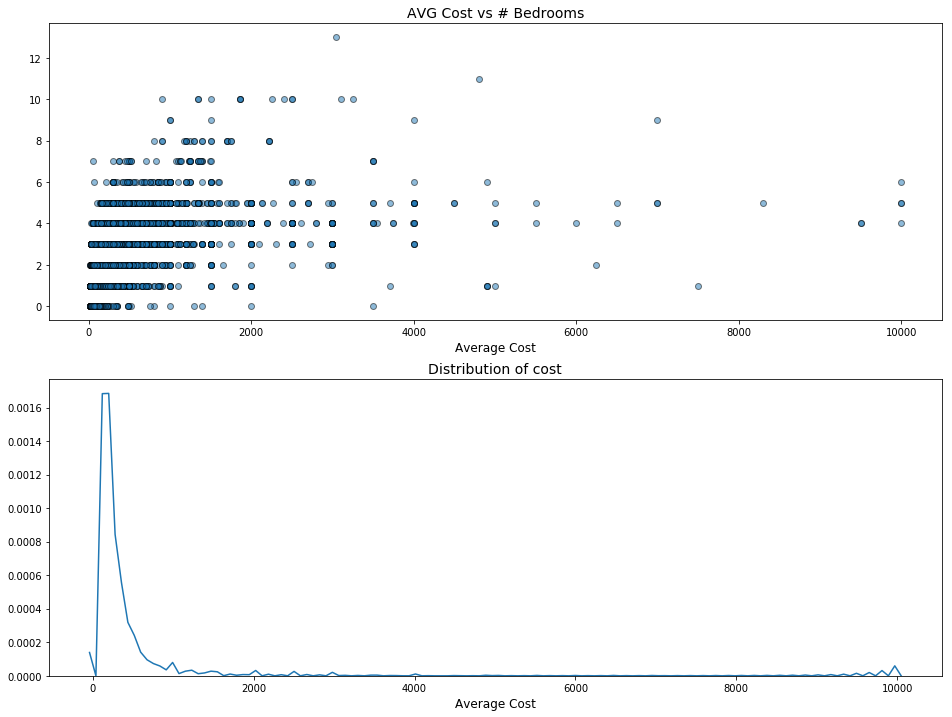

In [6]:
# How average night rate depends on number of bedrooms
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
plt.scatter(df.avg_cost, df.bedrooms, alpha=0.5, edgecolors='k')
plt.xlabel('Average Cost', fontsize = 12)
plt.title('AVG Cost vs # Bedrooms', fontsize=14)
plt.subplot(2,1,2)
sns.distplot(df.avg_cost, hist=False)
plt.xlabel('Average Cost', fontsize = 12)
plt.title('Distribution of cost', fontsize=14)
plt.show()

Highly right skewed distribution of average cost value. Most of properties cost less than 2K dollars according to scatter plot!

In [7]:
print('Proportion of properties with cost less than 2K dollars : {}%'.format(round(df.loc[df.avg_cost<=2000].count()[0]/len(df)*100,2)))

Proportion of properties with cost less than 2K dollars : 99.25%


In [8]:
# Function for Seaborn Countplots.
def countplot(data, xlabel, ylabel, title, labels):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.countplot(data)
    plt.xlabel(xlabel, fontsize=13)
    if labels:
        ax.set_xticklabels(labels)
    plt.ylabel(ylabel, fontsize = 13)
    plt.title(title, fontsize=14)
    return(plt.show())


In [9]:
# When was the first and the last booking arranged in dataset.
print("Date of first booking: {},\nDate of last booking: {}".format(str(df.date.min())[:10], str(df.date.max())[:10]))

Date of first booking: 2008-12-01,
Date of last booking: 2017-06-01


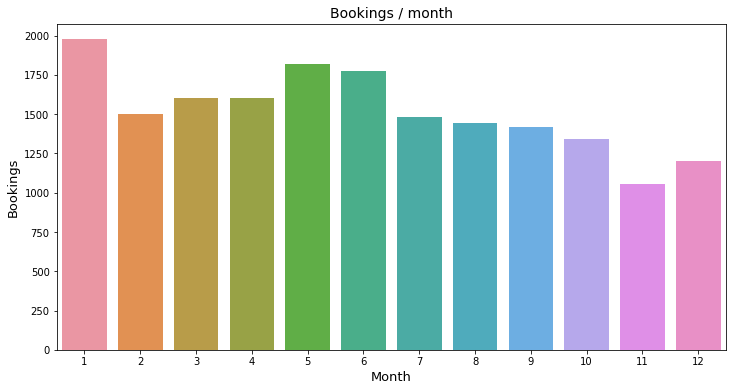

In [10]:
countplot(df.month, 'Month', 'Bookings', 'Bookings / month', None)

January has a lot of reservations. Following the 'bi-month' May-June! November's reservation are more sparse!

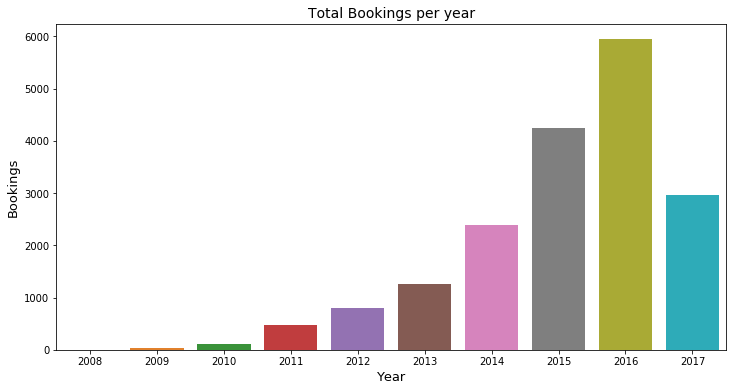

In [11]:
countplot(df.year, 'Year', 'Bookings', 'Total Bookings per year', None)

Year 2008 includes only one month (December), and year 2017 stops to 1st of June! However we can clearly see the exponential increase of bookings through years. Airbnb conquered Real Estate business.

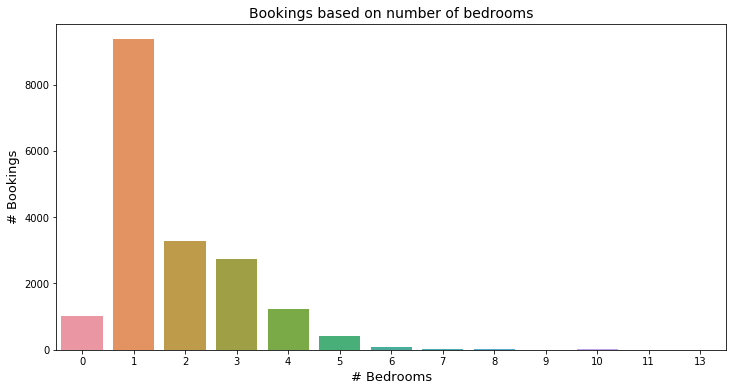

In [12]:
countplot(df.bedrooms, '# Bedrooms', '# Bookings', 'Bookings based on number of bedrooms', None)

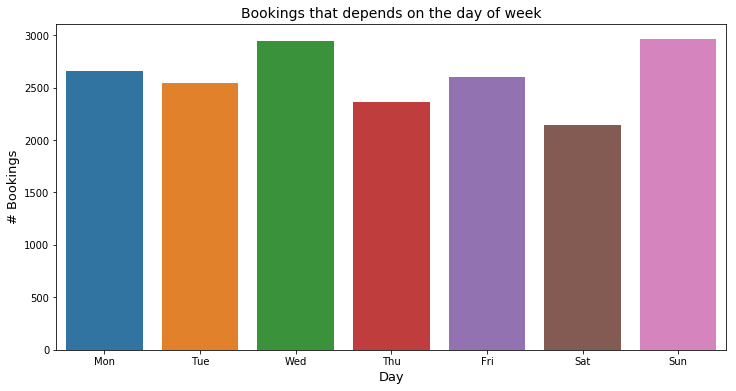

In [13]:
countplot(df.day_of_week, 'Day', '# Bookings', 'Bookings that depends on the day of week',
          ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


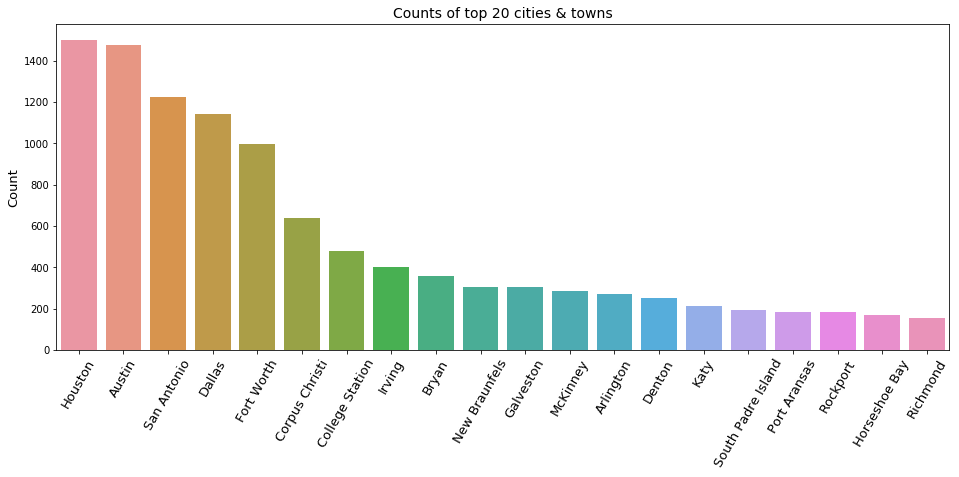

In [14]:
from collections import Counter
cts = Counter(df.city).most_common(20)
plt.figure(figsize=(16,6))
sns.barplot([cts[i][0] for i in range(len(cts))], [cts[i][1] for i in range(len(cts))])
plt.xticks(rotation = 60, fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.title('Counts of top 20 cities & towns', fontsize = 14)
plt.show()

In [15]:
# 10 less visited places of TX.
Counter(df.city).most_common()[:-10-1:-1]  

[('Tuscola', 1),
 ('Port Bolivar', 1),
 ('Montalba', 1),
 ('Merkel', 1),
 ('Galveston County', 1),
 ('Hawkins', 1),
 ('Bells', 1),
 ('Needville', 1),
 ('Goliad', 1),
 ('CIty by the Sea', 1)]

I want to see on a map where properties are identified through all Texas counties, using **Basemap** and its tools.

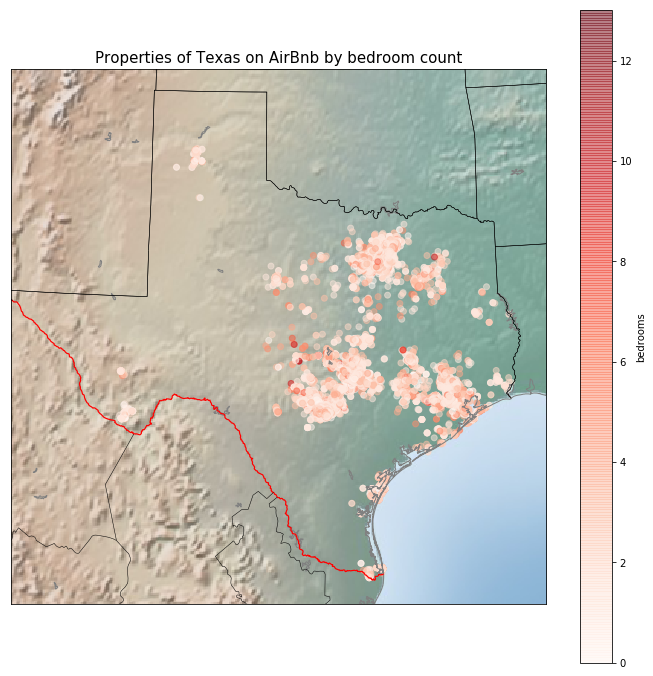

In [16]:
lat = df.latitude.values
lon = df.longitude.values
rooms = df.bedrooms.values

fig = plt.figure(figsize=(12,12))

m = Basemap(projection = 'lcc', resolution='h',
            lat_0 = 31.169621, lon_0 = -99.683617,
            width=1.3E6, height=1.3E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='red',linewidth=1.2)
m.drawstates(color='black')

m.scatter(lon, lat, latlon=True,
          c = rooms,
          cmap='Reds',
          alpha=0.5)

plt.colorbar(label=r'bedrooms')
plt.clim(0, 13)
plt.title('Properties of Texas on AirBnb by bedroom count', fontsize=15)
plt.show()

### Text Analysis

In [17]:
# convert string to its initial list type
import ast
df['title'] = df['title'].apply(lambda x: ast.literal_eval(x))
df['description'] = df['description'].apply(lambda x: ast.literal_eval(x))

In [18]:
tokens_count = Counter()

cols = ['title', 'description']
for col in cols:
    for word in df[col]:
        tokens_count.update(word)

from spacy.lang.en.stop_words import STOP_WORDS

tokens = [token for token in tokens_count if token not in STOP_WORDS]
counts = [tokens_count[token] for token in tokens]

# NO stop words
tokens_no_stop = {tok: count for tok,count in zip(tokens, counts)}
print('unique total tokens = {}'.format(len(tokens_no_stop)))

unique total tokens = 13109


In [19]:
# Top 15 most frequent words (no stop words) 
Counter(tokens_no_stop).most_common(15)

[('home', 10393),
 ('room', 8869),
 ('bedroom', 8858),
 ('place', 7721),
 ('2', 7453),
 ('private', 7247),
 ('downtown', 6283),
 ('house', 6179),
 ('minute', 6082),
 ('bed', 5795),
 ('close', 5530),
 ('bathroom', 5399),
 ('park', 4853),
 ('locate', 4822),
 ('family', 4369)]

### Description Similarities with Gensim

A bunch of data points are duplicates, alhtough they sometimes have different average cost. This depends when the appartment-room had been reserved. The same property appears to cost x dollars in a specific period and cost y in another period with low frequent reservations (where x > y). However the description remains the same... 

In [21]:
from gensim import corpora, models, similarities

In [22]:
corpus = list(df.description)

In [23]:
# create dictionary
dictionary = corpora.Dictionary(corpus)
dictionary.save('corpus.dict')
print("We create a dictionary, an index of all unique values: %s"%len(dictionary))

We create a dictionary, an index of all unique values: 11980


In [24]:
# vectors number of times each element appears
raw_corpus = [dictionary.doc2bow(t) for t in corpus]
corpora.MmCorpus.serialize('corpus.mm', raw_corpus)

In [25]:
# load dictionary and corpus in suitable format
dictionary = corpora.Dictionary.load('corpus.dict')
corpus = corpora.MmCorpus('corpus.mm')

In [26]:
# TF-IDF transformation
tf_idf = models.TfidfModel(corpus)

corpus_tfidf = tf_idf[corpus]

In [27]:
# Create similarity matrix of all files

index = similarities.MatrixSimilarity(tf_idf[corpus])
index.save('description.index')
index = similarities.MatrixSimilarity.load('description.index')

sims = index[corpus_tfidf]

In [28]:
sims

array([[1.0000000e+00, 5.2722633e-02, 4.3664590e-02, ..., 6.9817618e-02,
        3.5076164e-02, 3.5300143e-02],
       [5.2722633e-02, 9.9999982e-01, 1.9999564e-02, ..., 3.4923673e-02,
        8.1941247e-02, 1.2621842e-02],
       [4.3664590e-02, 1.9999564e-02, 1.0000000e+00, ..., 5.4577319e-04,
        1.0657650e-01, 2.7941553e-02],
       ...,
       [6.9817618e-02, 3.4923673e-02, 5.4577319e-04, ..., 1.0000001e+00,
        3.5611026e-02, 2.4556123e-02],
       [3.5076164e-02, 8.1941247e-02, 1.0657650e-01, ..., 3.5611026e-02,
        9.9999988e-01, 2.1839473e-02],
       [3.5300143e-02, 1.2621842e-02, 2.7941553e-02, ..., 2.4556123e-02,
        2.1839473e-02, 9.9999994e-01]], dtype=float32)

In [29]:
# example
sims_ = sorted(enumerate(sims[2]), key=lambda item: -item[1])
sims_[:5]

[(2, 1.0), (998, 1.0), (7567, 1.0), (7566, 0.3279775), (6611, 0.30780396)]

In [30]:
# get similarities / trying to avoid duplicates

def sims_by_index(ind, up_thres, low_thres):
    sims_ind = sorted(enumerate(sims[ind]), key=lambda item: -item[1])[1:6]
    for i in range(len(sims_ind)):
        # set a threshold on similarity score
        if (sims_ind[i][1] < up_thres) and (sims_ind[i][1] > low_thres):
            return(sims_ind[i])
        else:
            pass

In [31]:
sims_by_index(3, 0.7, 0.5)

(4989, 0.5071484)

In [32]:
print("Similar descriptions: rows 3 & 4989\n\n'{}' \n\nis similar with \n\n'{}'".format(' '.join(df.description[3]),
                                                                                        ' '.join(df.description[4989])))

Similar descriptions: rows 3 & 4989

'private bedroom in cute little home situate in the covet garden acre neighborhood in bryan the bedroom have its own private access and its own private bathroom' 

is similar with 

'this be cute 1 700 square foot home locate in the covet garden acre neighborhood of bryan college station two of the bedroom have their own private entrance have large yard for bbqs and sit next to garden acre park'
